In [0]:
import numpy
print(numpy.__version__)

1.14.6


In [0]:
import pandas
print(pandas.__version__)

0.22.0


In [0]:
import matplotlib
print(matplotlib.__version__)

2.1.2


In [0]:
import wordcloud
print(wordcloud.__version__)

1.5.0


In [0]:
import sklearn
print(sklearn.__version__)

0.19.2


In [0]:
import keras
print(keras.__version__)

2.2.4


In [66]:
import pandas as pd

df = pd.read_csv('3d_lottery.csv')
df.head()

,期号,中奖号码,总和,总销售额,直选注数,直选奖金,组选3注数,组选3奖金,组选6注数,组选6奖金,开奖日期
0,2018198,3 7 9,19,"44,710,690",19178,"1,040",NaN,NaN,29671.0,173.0,2018-07-24
1,2018197,1 5 0,6,"43,907,342",14712,"1,040",NaN,NaN,22994.0,173.0,2018-07-23
2,2018196,0 0 5,5,"46,401,818",7886,"1,040",11089.0,346.0,NaN,NaN,2018-07-22
3,2018195,7 3 6,16,"46,324,112",20491,"1,040",NaN,NaN,29380.0,173.0,2018-07-21
4,2018194,3 7 5,15,"46,948,712",22647,"1,040",NaN,NaN,47504.0,173.0,2018-07-20


In [0]:
min_lottery_date = min(df["开奖日期"])
max_lottery_date = max(df["开奖日期"])
lottery_len = len(df)
print("从{}到{}的福彩3D开奖记录，共计{}条。".format(min_lottery_date, max_lottery_date, lottery_len))

从2004-10-18到2018-07-24的福彩3D开奖记录，共计4927条。


In [67]:
# 中奖号码数字之间的空格处理
win_number_list = [[n if len(n) > 0 else '' for n in num_str.split(' ')] for num_str in df["中奖号码"]]
print(win_number_list[:10])

[['3', '7', '9'], ['1', '5', '0'], ['0', '0', '5'], ['7', '3', '6'], ['3', '7', '5'], ['0', '6', '1'], ['8', '9', '3'], ['5', '0', '3'], ['5', '5', '6'], ['7', '6', '0']]


In [68]:
# 中奖号码列表
won_number_list = [int(''.join(num)) for num in win_number_list]
print(won_number_list[:10])

[379, 150, 5, 736, 375, 61, 893, 503, 556, 760]


In [69]:
# 将DataFrame中[中奖号码]列的值更新
df["中奖号码"] = won_number_list
df.head()

,期号,中奖号码,总和,总销售额,直选注数,直选奖金,组选3注数,组选3奖金,组选6注数,组选6奖金,开奖日期
0,2018198,379,19,"44,710,690",19178,"1,040",NaN,NaN,29671.0,173.0,2018-07-24
1,2018197,150,6,"43,907,342",14712,"1,040",NaN,NaN,22994.0,173.0,2018-07-23
2,2018196,5,5,"46,401,818",7886,"1,040",11089.0,346.0,NaN,NaN,2018-07-22
3,2018195,736,16,"46,324,112",20491,"1,040",NaN,NaN,29380.0,173.0,2018-07-21
4,2018194,375,15,"46,948,712",22647,"1,040",NaN,NaN,47504.0,173.0,2018-07-20


In [0]:
import matplotlib.pyplot as plt
# 设置matplotlib在绘图时的默认样式
plt.style.use('default')

In [0]:
def query_by_date(df, begin_date_str, end_date_str):
    """
    定义根据日期查询中奖号码的函数
    """
    # 设置查询时开奖日期的条件
    mask = (df['开奖日期'] >= begin_date_str) & (df['开奖日期'] <= end_date_str)
    # 通过loc切片获取查询数据
    return df.loc[mask]

def draw_line_chart(X, y, title): 
    """
    绘图，X表示开奖期号，y表示开奖号码，
    """
    # 设置绘图对象大小
    plt.figure(figsize = (14, 5))
    # 根据X和y来绘图
    plt.plot(X, y)
    # 设置标题
    plt.title(title)
    # 设置X轴的标签
    plt.xlabel("Number of Periods")
    # 设置y轴的标签
    plt.ylabel("Won Numbers")
    # 显示网格
    plt.grid()
    # 显示图像
    plt.show()
    
# 起始日期
start_date = '2018-01-01'
# 结束日期
end_date = '2018-07-31'
# 查询2018年的中奖号码记录
year_of_2018_df = query_by_date(df, start_date, end_date)
# 显示前5条中奖号码记录
year_of_2018_df.head()

,期号,中奖号码,总和,总销售额,直选注数,直选奖金,组选3注数,组选3奖金,组选6注数,组选6奖金,开奖日期
0,2018198,379,19,"44,710,690",19178,"1,040",NaN,NaN,29671.0,173.0,2018-07-24
1,2018197,150,6,"43,907,342",14712,"1,040",NaN,NaN,22994.0,173.0,2018-07-23
2,2018196,5,5,"46,401,818",7886,"1,040",11089.0,346.0,NaN,NaN,2018-07-22
3,2018195,736,16,"46,324,112",20491,"1,040",NaN,NaN,29380.0,173.0,2018-07-21
4,2018194,375,15,"46,948,712",22647,"1,040",NaN,NaN,47504.0,173.0,2018-07-20


In [0]:
print("{}到{}共有{}条开奖记录。".format(start_date, end_date, len(year_of_2018_df)))

2018-01-01到2018-07-31共有198条开奖记录。


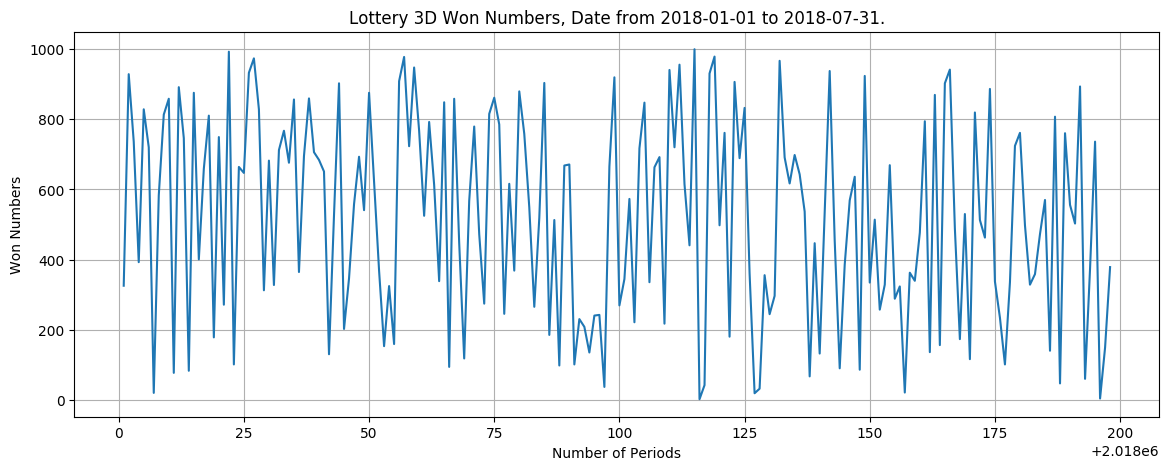

In [0]:
# 绘制2018-01-01到2018-07-31日的开奖号码走势图
title_2018 = "Lottery 3D Won Numbers, Date from {} to {}.".format(start_date, end_date)
draw_line_chart(year_of_2018_df["期号"], year_of_2018_df["中奖号码"], title_2018)

In [0]:
start_date_2017 = '2017-01-01'
end_date_2017 = '2017-12-31'
year_of_2017_df = query_by_date(df, start_date_2017, end_date_2017)
year_of_2017_df.head()

,期号,中奖号码,总和,总销售额,直选注数,直选奖金,组选3注数,组选3奖金,组选6注数,组选6奖金,开奖日期
198,2017358,612,9,"45,404,058",14879,"1,040",NaN,NaN,28116.0,173.0,2017-12-31
199,2017357,665,17,"46,328,368",14010,"1,040",18408.0,346.0,NaN,NaN,2017-12-30
200,2017356,647,17,"47,229,832",24328,"1,040",NaN,NaN,43443.0,173.0,2017-12-29
201,2017355,31,4,"46,945,714",12371,"1,040",NaN,NaN,29519.0,173.0,2017-12-28
202,2017354,294,15,"48,270,332",7927,"1,040",NaN,NaN,26860.0,173.0,2017-12-27


In [0]:
print("{}到{}共有{}条开奖记录。".format(start_date_2017, end_date_2017, len(year_of_2017_df)))

2017-01-01到2017-12-31共有358条开奖记录。


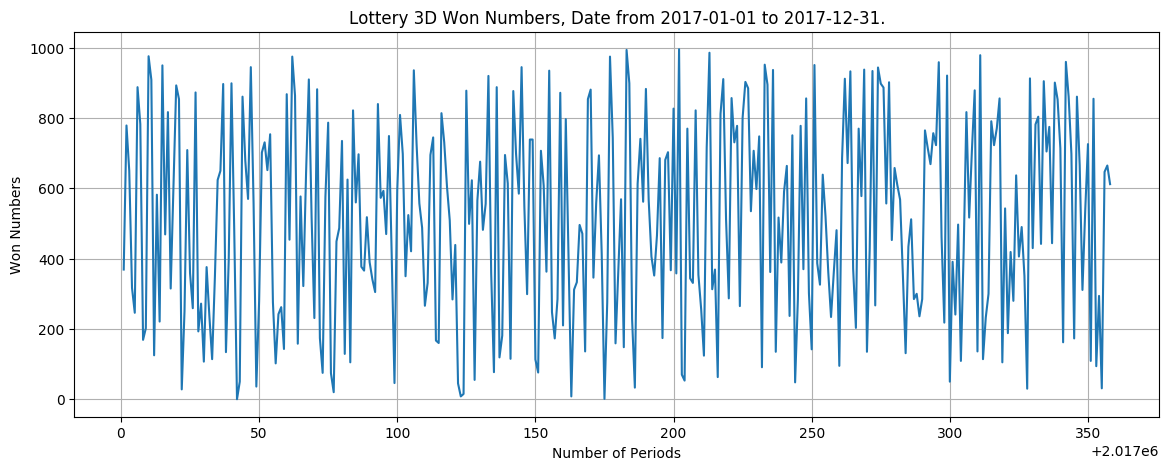

In [0]:
title_2017 = "Lottery 3D Won Numbers, Date from {} to {}.".format(start_date_2017, end_date_2017)
draw_line_chart(year_of_2017_df["期号"], year_of_2017_df["中奖号码"], title_2017)

In [0]:
from collections import Counter

counter = Counter(won_number_list)

# 查看最常见的前15组数字
counter.most_common(15)

[(369, 14),
 (573, 13),
 (209, 12),
 (393, 12),
 (827, 12),
 (139, 12),
 (669, 11),
 (960, 11),
 (731, 11),
 (899, 11),
 (784, 11),
 (144, 11),
 (667, 11),
 (363, 10),
 (20, 10)]

In [0]:
most_common_list = counter.most_common()
print("开过奖的数字组合有{}种。".format(len(most_common_list)))

开过奖的数字组合有994种。


In [0]:
# 福彩3D有1000种组合，上面我们看到有994种组合出现过，那么我们看下是哪六种组合是没有开过奖的
other_numbers = []
# 先对1000以内的数字进行遍历
for i in range(0, 1000):
    found = False
    # 再对开过奖的数字进行对比
    for num in most_common_list:
        if i == num[0]:
            found = True
            break
    if not found:
        other_numbers.append(i)
        
def padding_zero(other_numbers):
    results = []
    for num in other_numbers:
        if len(str(num)) == 1:
            results.append("00" + str(num))
        elif len(str(num)) == 2:
            results.append("0" + str(num)) 
        else:
            results.append(str(num))
    return results

print("这六种数字组合从未开过奖，它们分别是：{}。".format(padding_zero(other_numbers)))

这六种数字组合从未开过奖，它们分别是：['025', '089', '121', '445', '629', '953']。


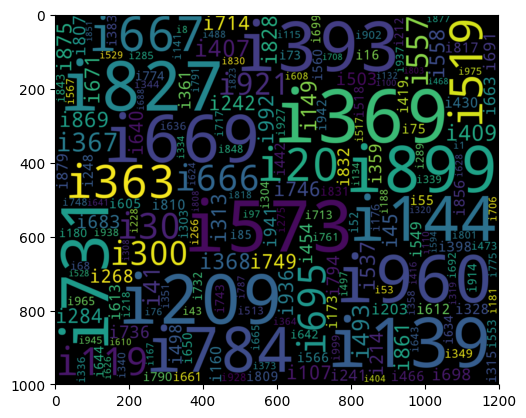

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def draw_wordcloud_image(data_text):
    # 生成词云图片WordCloud对象
    wordcloud = WordCloud(min_font_size=5,
                          max_font_size=200, 
                                  width=1200, 
                                 height=1000, 
                         ).generate(data_text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()
     
draw_wordcloud_image(" ".join(["i" + str(n) for n in won_number_list]))

In [0]:
features = df["中奖号码"]

In [0]:
import numpy as np

def split_sequence(sequence, n_steps):
    """
    分割单变量序列（univariate sequence）
    """
    sequence = sequence[::-1]
    X, y = list(), list()
    for i in range(len(sequence)):
        # 找到指定n_steps长度的模式，X加上y的长度
        end_ix = i + n_steps
        # 如果最后一个模式的长度超出了总长度，就忽略最后一个模式
        if end_ix > len(sequence)-1:
            break
        # 获取本次的X和y的值，
        # X的获取方式：i表示起始值，end_ix表示该n_steps模式的长度的值
        # y的获取方式：就是end_ix本身
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        # 添加X和y到数组中
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
  
  
def preview_sequence(X, y, top=10):
    """
    查看前top个的特征和目标序列值
    """
    _X = X[len(X) - top:]
    _y = y[len(X) - top:]
    for i, v in enumerate(_X):
        print(v, _y[i])

In [0]:
X, y = split_sequence(features.values, 3)
preview_sequence(X, y)

[141 807  48] 760
[807  48 760] 556
[ 48 760 556] 503
[760 556 503] 893
[556 503 893] 61
[503 893  61] 375
[893  61 375] 736
[ 61 375 736] 5
[375 736   5] 150
[736   5 150] 379


In [0]:
# 在sklearn下的model_selection模块的train_test_split()方法在这里是不能使用的，因为顺序很重要

test_ratio = 0.15
feature_len = len(X)
feature_test_length = int(feature_len * test_ratio)
X_train, y_train = X[feature_test_length:], y[feature_test_length:]
X_test, y_test = X[:feature_test_length], y[:feature_test_length]

print("X_train.shape={}, y_train.shape={}".format(X_train.shape, y_train.shape))
print("X_test.shape={}, y_test.shape={}".format(X_test.shape, y_test.shape))

X_train.shape=(4186, 3), y_train.shape=(4186,)
X_test.shape=(738, 3), y_test.shape=(738,)


# 训练模型预测

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def predict_by_DecisionTreeClassifier(train_X, train_y, test_X, test_y):
    """
    使用决策数模型预测
    """
    # 创建决策树模型对象
    model = DecisionTreeClassifier()
    # 训练模型
    model.fit(train_X, train_y)   
    # 预测训练集
    train_pred = model.predict(train_X)
    # 预测测试集
    test_pred = model.predict(test_X)
    # 计算训练集精确度
    train_accuracy = accuracy_score(train_y, train_pred)
    # 计算测试集精确度
    test_accuracy = accuracy_score(test_y, test_pred)
    # 输出
    print('训练精确度是：{}.'.format(train_accuracy))
    print('测试精确度是：{}'.format(test_accuracy))
  
predict_by_DecisionTreeClassifier(X_train, y_train, X_test, y_test)

训练精确度是：1.0.
测试精确度是：0.0040650406504065045


In [0]:
from sklearn.neural_network import MLPClassifier

def predict_by_MLPClassifier(train_X, train_y, test_X, test_y):
    """
    使用多层感知器预测
    """
    model = MLPClassifier(hidden_layer_sizes=128, batch_size=64, max_iter=1000, solver="adam")
    # 训练模型
    model.fit(train_X, train_y)
    # 预测训练集
    train_pred = model.predict(train_X)
    # 预测测试集
    test_pred = model.predict(test_X)
    # 输出
    print('训练集的神经网络分类器精确度是：{}。'.format(accuracy_score(train_y, train_pred)))
    print('测试集的神经网络分类器精确度是：{}。'.format(accuracy_score(test_y, test_pred)))
  
predict_by_MLPClassifier(X_train, y_train, X_test, y_test)

训练集的神经网络分类器精确度是：0.08767319636884854。
测试集的神经网络分类器精确度是：0.0013550135501355014。


# 时间序列预测

In [0]:
from keras import backend as K 
def clear_session():
    K.clear_session()

Using TensorFlow backend.


In [0]:
import numpy as np
X = np.array([[10, 20, 30], [20, 30, 40], [30, 40, 50], [40, 50, 60]]) 
y = np.array([40, 50, 60, 70])

In [0]:
# 基于单变量（Univariate）的多层感知器

import numpy as np
from keras.models import Sequential
from keras.layers import Dense

def train_mlp_predictor(X, y, need_clear_session=False):
    # 是否需要清空Keras会话
    if need_clear_session:
        clear_session()
  
    # 定义模型
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=3)) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    # 训练模型
    model.fit(X, y, epochs=2000, verbose=0)
    return model
    
mlp_predictor_model = train_mlp_predictor(X, y, True)

# 测试
x_input = np.array([50, 60, 70])
x_input = x_input.reshape((1, 3))
yhat = mlp_predictor_model.predict(x_input, verbose=0)
print("预测的值: {}。".format(yhat))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________
预测的值: [[80.05862]]。


In [0]:
# 数字顺序预测 基于单变量（Univariate）的卷积神经网络预测

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


# 将训练数据从[samples, timesteps]格式转换到[samples, timesteps, features]格式
X = X.reshape((X.shape[0], X.shape[1], 1))

def train_cnn_predictor(X, y, need_clear_session=False):
    # 是否需要清空Keras会话
    if need_clear_session:
        clear_session()
 
    # 定义模型
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(3, 1))) 
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    # 训练模型
    model.fit(X, y, epochs=1000, verbose=0)
    return model
    
cnn_predictor_model = train_cnn_predictor(X, y, True)

# 测试
x_input = np.array([50, 60, 70])
x_input = x_input.reshape((1, 3, 1))
yhat = cnn_predictor_model.predict(x_input, verbose=0)
print("预测的值: {}。".format(yhat))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 64)             192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3250      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 3,493
Trainable params: 3,493
Non-trainable params: 0
_________________________________________________________________
预测的值: [[80.908264]]。


In [0]:
# 数字顺序预测 基于单变量（Univariate）的长短期记忆网络预测

import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

def train_lstm_predictor(X, y, need_clear_session=False):
    # 是否需要清空Keras会话
    if need_clear_session:
        clear_session()

    # 定义模型
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(3, 1))) 
    model.add(Dense(1))
    model.summary()
    model.compile(optimizer='adam', loss='mse')
    # 训练模型
    model.fit(X, y, epochs=1000, verbose=0)
    return model

X = X.reshape((X.shape[0], X.shape[1], 1))
lstm_predictor_model = train_lstm_predictor(X, y, True)

# 预测
x_input = np.array([50, 60, 70])
x_input = x_input.reshape((1, 3, 1))
yhat = lstm_predictor_model.predict(x_input, verbose=0)
print("预测的值: {}。".format(yhat))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
预测的值: [[83.401054]]。


In [0]:
import math

# 训练模型
mlp_predictor_model = train_mlp_predictor(X_train, y_train, True)
# 预测
y_hat = mlp_predictor_model.predict(X_test, verbose=0)
# 输出前10个号码
for i in range(10):
    print("真实中奖号码={} : {}=预测中奖号码.".format(y_test[i], math.ceil(y_hat[i])))

真实中奖号码=791 : 434=预测中奖号码.
真实中奖号码=941 : 513=预测中奖号码.
真实中奖号码=611 : 535=预测中奖号码.
真实中奖号码=144 : 492=预测中奖号码.
真实中奖号码=471 : 532=预测中奖号码.
真实中奖号码=505 : 527=预测中奖号码.
真实中奖号码=828 : 516=预测中奖号码.
真实中奖号码=607 : 461=预测中奖号码.
真实中奖号码=878 : 510=预测中奖号码.
真实中奖号码=477 : 522=预测中奖号码.


In [0]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# 训练模型
lstm_predictor_model = train_lstm_predictor(X_train, y_train, True)
# 预测
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_hat = lstm_predictor_model.predict(X_test, verbose=0)
# 输出前10个号码
for i in range(10):
    print("真实中奖号码={} : {}=预测中奖号码.".format(y_test[i], math.ceil(y_hat[i])))

真实中奖号码=791 : 409=预测中奖号码.
真实中奖号码=941 : 528=预测中奖号码.
真实中奖号码=611 : 620=预测中奖号码.
真实中奖号码=144 : 536=预测中奖号码.
真实中奖号码=471 : 581=预测中奖号码.
真实中奖号码=505 : 644=预测中奖号码.
真实中奖号码=828 : 535=预测中奖号码.
真实中奖号码=607 : 473=预测中奖号码.
真实中奖号码=878 : 466=预测中奖号码.
真实中奖号码=477 : 519=预测中奖号码.


# 根据开奖号码单变量单个位数预测

In [0]:
# 将每个数字都转换成整型
win_number_list_2 = [[int(n) for n in t] for t in win_number_list]
# 取出第一列的值
first_column = np.array(win_number_list_2)[:,0]
# 取出第二列的值
second_column = np.array(win_number_list_2)[:,1]
# 取出第三列的值
third_column = np.array(win_number_list_2)[:,2]

In [0]:
def split_data_features(X, n_steps=3):
    X, y = split_sequence(X, n_steps)
    return X, y
  
# 数据分割与准备
first_X, first_y = split_data_features(first_column)
second_X, second_y = split_data_features(second_column)
third_X, third_y = split_data_features(third_column)

In [0]:
def train_my_model(X, y, modelpath):
    X = X.reshape(X.shape[0], X.shape[1], 1)
    mlp_predictor_model = train_lstm_predictor(X, y, True) 
    mlp_predictor_model.save(modelpath)
    
# 训练模型
first_model_path = "first_model.h5"
second_model_path = "second_model.h5"
third_model_path = "third_model.h5"
train_my_model(first_X, first_y, first_model_path)
train_my_model(second_X, second_y, second_model_path)
train_my_model(third_X, third_y, third_model_path)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
La

In [0]:
# 加载模型
from keras.models import load_model
first_data_model = load_model(first_model_path)
second_data_model = load_model(second_model_path)
third_data_model = load_model(third_model_path)

In [0]:
# 分割测试数据，就把训练过的数据中，选择10条开奖记录出来，然后每三个一组，最终会产生7组。
first_test_X, first_test_y = split_data_features(first_column[:10])
second_test_X, second_test_y = split_data_features(second_column[:10])
third_test_X, third_test_y = split_data_features(third_column[:10])

# 我们使用的是LSTM网络训练的模型，在数据传入前，需要reshape数据成
# reshape就是从 [samples, timesteps] 修改成 [samples, timesteps, features]
first_test_X = first_test_X.reshape(first_test_X.shape[0], first_test_X.shape[1], 1)
second_test_X = second_test_X.reshape(second_test_X.shape[0], second_test_X.shape[1], 1)
third_test_X = third_test_X.reshape(third_test_X.shape[0], third_test_X.shape[1], 1)

# 预测数据
first_predicted_val = first_data_model.predict(first_test_X, verbose=0)
second_predicted_val = second_data_model.predict(second_test_X, verbose=0)
third_predicted_val = third_data_model.predict(third_test_X, verbose=0)

In [0]:
import math

# 我们来预测对比下数据，发现错的离谱
# 将这三列的序列数据水平堆砌起来
final_predicted_X = np.vstack([first_predicted_val[:,0], second_predicted_val[:,0], third_predicted_val[:,0]])
final_target_X = np.vstack([first_test_y[:10].tolist(), second_test_y[:10].tolist(), third_test_y[:10].tolist()])

# 通过transpose()转置数据数组，便于打印输出
final_predicted_X = final_predicted_X.transpose()
final_target_X = final_target_X.transpose()
for i, v in enumerate(final_predicted_X):
    print("P: {} vs T: {}.".format([math.ceil(p) for p in final_predicted_X[i]], final_target_X[i]))

P: [5, 5, 4] vs T: [8 9 3].
P: [4, 5, 5] vs T: [0 6 1].
P: [5, 5, 5] vs T: [3 7 5].
P: [4, 4, 5] vs T: [7 3 6].
P: [3, 5, 5] vs T: [0 0 5].
P: [5, 5, 5] vs T: [1 5 0].
P: [5, 6, 6] vs T: [3 7 9].
